In [15]:
import pandas as pd
import os  
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\Joey McMeans\\Desktop\\Joey School 2021')
os.getcwd()
cathdf = pd.read_csv("Elem_Catholic.csv")

In [5]:
from pyparsing import col


cathdf.head()
cathdf = cathdf.drop(columns=["Unnamed: 0","Board Name", "Board Type", "School Name","School Type","School Language","School Level","Grade Range","City","Province", "School Special Condition Code"])
#cathdf = cathdf.drop(columns=["School Special Condition Code"])
cathdf.head()
#publicdf = publicdf.drop(columns=["School Language"])
categorical = ["Enrolment"]
continuous = ['Percentage of Students Whose First Language Is Not English',
       'Percentage of Students Whose First Language Is Not French',
       'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
       'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
       'Percentage of Students Receiving Special Education Services',
       'Percentage of Students Identified as Gifted',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 3 Reading Achievement Over Three Years',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',
       'Change in Grade 3 Writing Achievement Over Three Years',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',
       'Change in Grade 3 Mathematics Achievement Over Three Years',
       'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 6 Reading Achievement Over Three Years',
       'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',
       'Change in Grade 6 Writing Achievement Over Three Years',
       'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',
       'Change in Grade 6 Mathematics Achievement Over Three Years',
       'Percentage of School-Aged Children Who Live in Low-Income Households',
       'Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']
cathdf.head()

,Enrolment,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Change in Grade 3 Reading Achievement Over Three Years,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,...,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Change in Grade 3 Mathematics Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Change in Grade 6 Reading Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Change in Grade 6 Writing Achievement Over Three Years,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate"
0,245,0.05,1.0,0.0,0.0,0.2,0.0,0.82,-9,0.79,...,0.68,-3,0.68,-10,0.77,-11,0.27,-20,0.15,0.00
1,415,0.10,1.0,0.0,0.0,0.1,0.0,0.82,-13,0.77,...,0.69,-7,0.90,-2,0.94,2,0.61,-8,0.15,0.00
2,350,0.00,1.0,0.0,0.0,0.2,0.0,0.64,-2,0.64,...,0.36,-17,0.71,-7,0.69,-18,0.40,-8,0.25,0.00
3,135,0.00,1.0,0.0,0.0,0.2,0.0,0.69,-31,1.00,...,0.69,-21,1.00,15,1.00,15,0.73,19,0.05,0.05
4,215,0.00,1.0,0.0,0.0,0.2,0.0,0.60,10,0.60,...,0.35,-15,0.56,-6,0.74,21,0.22,-6,0.30,0.10


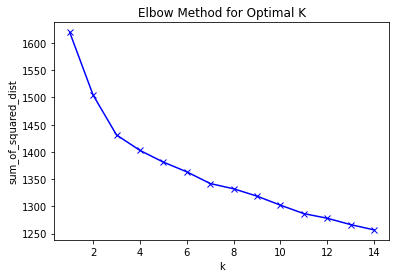

In [10]:
for col in categorical:
    dummies = pd.get_dummies(cathdf[col], prefix=col)
    data = pd.concat([cathdf,dummies],axis=1)
    data.drop(col,axis=1, inplace=True)
data.head()
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
sum_of_squared_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_dist.append(km.inertia_)
    
plt.plot(K, sum_of_squared_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_dist')
plt.title("Elbow Method for Optimal K")
plt.show()
#k = 3

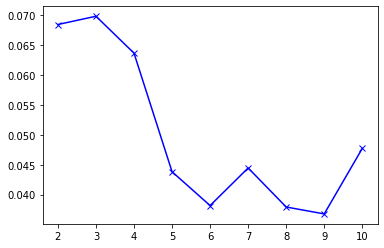

In [20]:
#Silhouette Method
from sklearn.metrics import silhouette_score


range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_transformed)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(data_transformed,cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')


[0 2 0 ... 2 0 2]


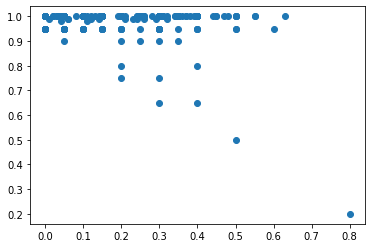

In [18]:
from itertools import groupby
import seaborn as sns
Km_sel = KMeans(init='k-means++',n_clusters=3,n_init=100, random_state=1).fit(data_transformed)
labels = pd.DataFrame(Km_sel.labels_)
lebals = Km_sel.fit_predict(data_transformed)
clustered_data = cathdf.assign(Cluster=labels)
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km
print(lebals)
filteredlabels = data_transformed[lebals == 0]
plt.scatter(filteredlabels[:,0],filteredlabels[:,1])
plt.show()

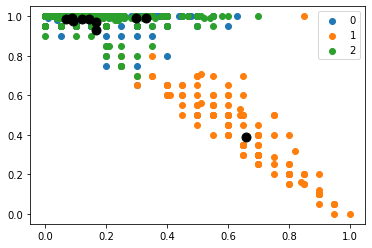

In [21]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(lebals)
u_labels
for i in u_labels:
    plt.scatter(data_transformed[lebals == i,0],data_transformed[lebals == i,1],label = i)
plt.scatter(centroids[:,0], centroids[:,1], s = 80, color = 'k')
plt.legend()
plt.show()